In [1]:
# load csv  as panda df and sort by column
import pandas as pd
from helper import *

def load_csv(file):
    df = pd.read_csv(file)
    df = df.sort_values(by=["acc_version", "hardware", "model", "thread"])
    df = df.sort_values(by=["thread", "model", "acc_version", "hardware"])
    df.fillna(0, inplace=True)
    valid_loc = df.columns.get_loc("valid")
    for i in range(valid_loc, len(df.columns)):
        df.iloc[:, i] = df.iloc[:, i].astype(int)
    df = df.drop(df.columns[[0]], axis=1)
    df = df.drop(columns=["del", "del_version"])
    return df


def combine(df, df2):
    df2 = df2[df.columns]
    df = pd.concat([df, df2], ignore_index=True)
    return df


def merge_rows(df,custom_cols=False,output_file="tmp/2.csv"):
    # combine acc_version, hardware into one col
    df["acc_version"] = df["acc_version"].astype(str)
    df["hardware"] = df["hardware"].astype(str)
    df["acc_version_hardware"] = df["acc_version"] + "_" + df["hardware"]
    # get unique acc_version_hardware
    acc_version_hardware = df["acc_version_hardware"].unique()
    # get unique model
    model = df["model"].unique()

    # create new df with model thread and column for each acc_version_hardware
    df2 = pd.DataFrame(columns=["model", "thread"] + list(acc_version_hardware))

    # for each model and thread, find the total_latency for each acc_version_hardware
    for m in model:
        for t in [1, 2]:
            # get the rows with the same model and thread
            df3 = df.loc[(df["model"] == m) & (df["thread"] == t)]
            # create a row for the model and thread
            df2 = pd.concat(
                [df2, pd.DataFrame([[m, t]], columns=["model", "thread"])],
                ignore_index=True,
            )
            # get the total_latency for each acc_version_hardware
            for a in acc_version_hardware:
                # get the rows with the same acc_version_hardware
                df4 = df3.loc[df3["acc_version_hardware"] == a]
                # get the sum of the total_latency
                total_latency = df4["total_latency"].sum()
                # add the total_latency to the df2 acc_version_hardware column
                df2.loc[(df2["model"] == m) & (df2["thread"] == t), a] = total_latency

    # sort by CPU
    df2 = df2.sort_values(by=["1_0_CPU", "model", "thread"])
    if custom_cols:
        df2 = custom_cols(df2)
    # #save to csv
    df2.to_csv(output_file, index=False)
    return df2

pd.set_option("display.precision", 0)



In [2]:
# create new df which combines the same model, with new col for each thread's total_latency
df = load_csv("../results/latest.csv")
# merge_rows(df, custom_tconv_cols, "tmp/2.csv")
# merge_rows(df, custom_tconv_cols, "tmp/2.csv")
merge_rows(df, False, "tmp/2.csv")


,model,thread,1_0_CPU,2_0_VMRPP,2_0_VMRPP_SH_QK
275,mnk_64_64_256,2,696,365,326
199,mnk_32_64_512,2,698,408,379
195,mnk_32_64_256,2,715,290,264
75,mnk_128_64_256,2,1202,497,449
279,mnk_64_64_512,2,1222,508,462
...,...,...,...,...,...
86,mnk_2048_1024_4096,1,9641170,2150521,1058174
107,mnk_2048_4096_4096,2,16913510,0,0
102,mnk_2048_4096_2048,1,17490411,0,0
26,mnk_1024_4096_4096,1,19220280,0,0


In [2]:
# load csv
# df = load_csv("../results/latest.csv")
# df = load_csv("../results/mm2imv2.csv")
# latest = load_csv("../results/latest.csv")

# tconv_2 = load_csv("../saved_results/tconv_2.csv")
# mm2imv2_1 = load_csv("../saved_results/mm2imv2_1_post_threading.csv")
# df3 = combine(mm2imv2_1, tconv_2)
# df3.to_csv("tmp/1.csv", index=False)
# merge_rows(df3)




tconv_2 = load_csv("../saved_results/tconv_2.csv")
mm2imv2_1 = load_csv("../saved_results/mm2imv2_1_post_threading_opt2.csv")
df3 = combine(mm2imv2_1, tconv_2)
df3.to_csv("tmp/1.csv", index=False)
# merge_rows(df3)
merge_rows(df3, custom_tconv_cols, "tmp/2.csv")




# create new df which combines the same model, with new col for each thread's total_latency
# df = load_csv("../results/latest.csv")
# merge_rows(df)

/tmp/ipykernel_882940/2722293509.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, i] = df.iloc[:, i].astype(int)


,model,thread,2_4_MM2IM,1_0_CPU,1_0_MM2IM,2_0_MM2IM,stride_x,stride_y,filters,ks,ih,iw,ic,MACs,Outputs,Compute Intensity
13,tconv_1_1_16_3_7_7_32,2,276,4758,424,463,1,1,16,3,7,7,32,225792,784,288
229,tconv_2_2_16_3_7_7_32,2,433,5160,617,633,2,2,16,3,7,7,32,225792,3136,72
21,tconv_1_1_16_3_9_9_32,2,352,7108,573,610,1,1,16,3,9,9,32,373248,1296,288
237,tconv_2_2_16_3_9_9_32,2,570,7418,825,905,2,2,16,3,9,9,32,373248,5184,72
15,tconv_1_1_16_3_7_7_64,2,314,7923,487,645,1,1,16,3,7,7,64,451584,784,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,tconv_2_2_64_5_11_11_256,1,8191,1362121,10457,22479,2,2,64,5,11,11,256,49561600,30976,1600
210,tconv_1_1_64_7_9_9_256,1,7474,1763687,9777,21025,1,1,64,7,9,9,256,65028096,5184,12544
426,tconv_2_2_64_7_9_9_256,1,9066,1764363,11899,25776,2,2,64,7,9,9,256,65028096,20736,3136
410,tconv_2_2_64_7_11_11_256,1,11826,2655798,15461,37333,2,2,64,7,11,11,256,97140736,30976,3136


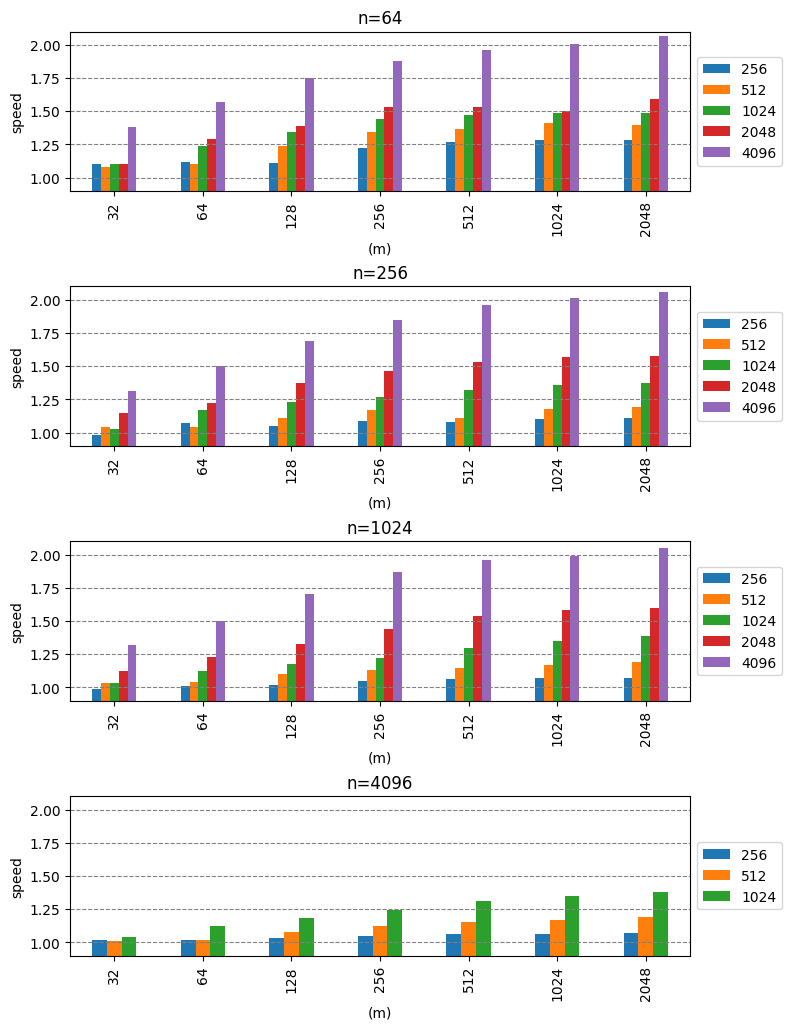

In [25]:
# create a 3d scatter plot
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file into a pandas DataFrame
df_test = pd.read_csv('/home/jude/Downloads/data.csv')

m = [32,64,128,256,512,1024,2048]
n= [64,256,1024,4096]
k = [256,512,1024,2048,4096]

# create set of subplot from df_test, where you len(m) subplots horiztonally and len(n) subplots vertical and with len(k)  bars in each plot and speed is values 
# fig, axes = plt.subplots(len(n), len(m), figsize=(12, 8))
# fig, axes = plt.subplots(len(m), len(n), figsize=(8, 12))
# for i, n_val in enumerate(n):
#   for j, m_val in enumerate(m):
#     ax = axes[j, i]
#     df_subset = df_test[(df_test['m'] == m_val) & (df_test['n'] == n_val)]
#     # create new df with only k and speed
#     df_subset = df_subset[['k', 'speedx mul']]
#     # sort by k
#     df_subset = df_subset.sort_values(by='k')
#     df_subset = df_subset.set_index('k')
#     df_subset.plot(kind='bar', ax=ax, legend=False)
#     ax.set_title(f'm={m_val}, n={n_val}')
#     ax.set_xlabel('k')
#     ax.set_ylabel('speed')
#     ax.set_ylim(0.9, 2.10)


# redo the plots so (m, k) appear on the x-axis and n subplots and speed on the y-axis
fig, axes = plt.subplots(len(n), figsize=(8, 12))
for i, n_val in enumerate(n):
    ax = axes[i]
    df_subset = df_test[df_test['n'] == n_val]
    df_subset = df_subset[['m', 'k', 'speedx mul']]
    df_subset = df_subset.pivot(index='m', columns='k', values='speedx mul')
    df_subset.plot(kind='bar', ax=ax)
    ax.set_title(f'n={n_val}')
    ax.set_xlabel('(m)')
    ax.set_ylabel('speed')
    ax.set_ylim(0.9, 2.10)
    # move legends to the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # add more vertical space between subplots
    plt.subplots_adjust(hspace=0.6)
    # add horizontal grid lines
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    


    
    


# plt.tight_layout()
plt.show()